Although most of the applications of Machine Learning today are based on supervised learning, the vast majority of the data is unlabeled: we have the input features X, but we do not have the labels y.

In chapter 8 we looked at the most common unsupervised learning task: dimensionality reduction. In this chapter we will look at a few more unsupervised learning tasks and algorithms:
* Clustering
* Anomaly detection
* Density estimation

## Clustering

Clustering is the task of identifying similar instances and assigning them to *clusters*, or groups of similar instances.

Clustering is used in a wide variety of applications, including these:
* Customer segmentation
    * To cluster the customers based on their purchases and their activities. For example, customer segmentation can be useful in recommender systems to suggst content that other users in the same cluster enjoyed.
* Data analysis
    * It can be helpful to run a clustering algorithm, and then analyze each cluster separately.
* Dimensionality reduction technique
    * Once a dataset has been clustered, it is usually possible to measure each instance's *affinity* with each cluster (affinitiy is any measure of how well an instance fits into a cluster). Each insteance's feature vector x can be replaced with the vector of its cluster affinities. If there a re k clusters, then this vector is k-dimensional. This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.
* Anomaly detection
    * Any instance that has a low affinity to all the clusters is likely to be an anomaly. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.
* Semi-Supervised learning
    * If we have only a few labels, we can perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increased the number of labels available for a subsequent supervised learning algorithm, and thus its performance.
* Search engines
    * Some search engines let us search for images that are similar to a reference image. To build such a system, we would first apply a clustering algorithm to all the images in our database, and similar images would en up in the same cluster. So, when a user provides a reference image, all we need to do is to use the trained clustering model to find the image's cluster.
* Segment an image
    * By clustering pixels according to their color, then replacing each pixel's color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


## K-Means

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Reproducing the charts
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

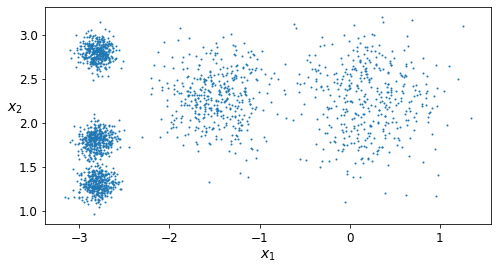

In [5]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

The K-Means algorithms is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations.

In [6]:
from sklearn.cluster import KMeans

In [7]:
k = 5 # The number of clusters has to be specified

kmeans = KMeans(n_clusters=k)

y_pred = kmeans.fit_predict(X)

In [8]:
y_pred is kmeans.labels_ #A copy of the labels of the instances is kept by the kmeans

True

In [9]:
kmeans.cluster_centers_ # Centroids found by the algorithm

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

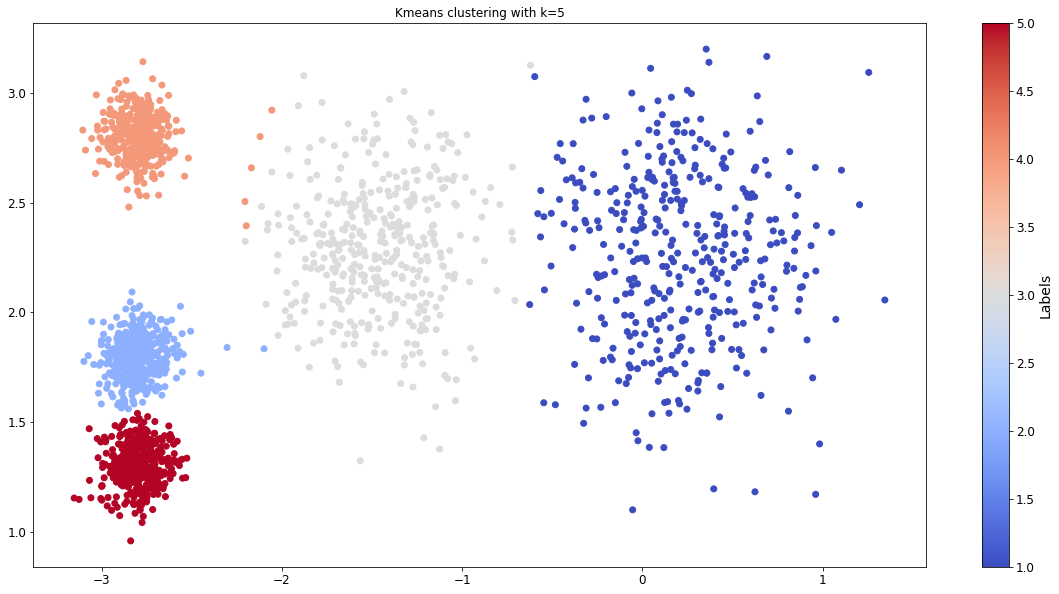

In [10]:
# setup the plot
fig, ax = plt.subplots(1,1, figsize=(20,10))

# define the data
x = [x[0] for x in X]
y = [x[1] for x in X]
label = [np.int(x) +1  for x in y_pred]
N = len(np.unique(label)) # Number of labels

# define the colormap
cmap = plt.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=label,cmap=cmap)

# create the colorbar
cb = plt.colorbar(scat, spacing='proportional')
cb.set_label('Labels')
ax.set_title(f'Kmeans clustering with k=5')
plt.show()

In [11]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.6]])
kmeans.predict(X_new) # Predict a new instance

array([0, 0, 3, 3], dtype=int32)

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially at the top-left cluster and central cluster). The K-Means algorithm does not 
behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.
Instead of assigning each instance to a single cluster, which is called *hard clustering*, it can be useful to give each instance a score per cluster, which is called *soft clustering*. The score can be the distance between the instance and the centroid, or it can be a similarity score (affinity), such as the Guassian Radial Basis Function.

In [12]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.22720179, 0.82253882, 1.5650568 , 0.28542297, 1.31442137]])

Here, the first instance is located at a distance of 2.90 from the first centroid, 0.32 from the second, etc.

If we have a high-dimensional dataset and we transform it this way, we end up with a k-dimensional dataset. This transformation can be a very efficient nonlinear dimensionality reduction technique.

## The K-Means algorithm

How doest the algorithm work?

Well, you just start by placing the centroids randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances, update the centroids, and so on until the centroids stop moving. The algorithm is guaranteed to converge in a finite number of steps (usually quite small).

/!\ The computational complexity of the algorithm is generally linear with regard to the number of instances m, the number of clusters k, and the number of dimensions n. However, this is only true when the data has a clustering structure. If it does not, then in the worst-case scenario, the complexity can increase exponentially with the number of instances. In pratice, this rarely happends, and K-Means is generally one of the fastest clustering algorithms.

Although the algorithm is guaranteed to converge, it may not converge to the right solution (it may converge to a local optimum): whether it does or not depends on the centroid initialization.

### Centroid initialization methods

In [13]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]]) #Initialization of the centroids
kmeans = KMeans(n_clusters=k,init=good_init,n_init=1) #n_init=1 to use the initialization of the centroid

Another solution is to run the algoritm multiple times with different random initializations and keep the best solution. The number of random initialization is controlled by the n_init hyperparameter. By default, it is equal to 10, which means that the whole algorithm described earlier run 10 times when we call fit() and keeps the best solution. To find the best solution, a performance metrique is used: it is *inertia*, which is the mean squared distance between each instance and its closest centroid.
The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia.

In [14]:
kmeans.fit_predict(X)

array([2, 1, 4, ..., 0, 4, 1], dtype=int32)

In [15]:
print(f"KMeans inertia: {kmeans.inertia_}")
print(f"KMeans score: {kmeans.score(X)}") #return negative inertia to follow the Scikit-Learn's "greater is better" rule

KMeans inertia: 211.5985372581684
KMeans score: -211.59853725816845


The KMeans class uses the K-Means++ algorithm, which introduces a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution. By default, Scitkit-Learn uses this initialization method by default. If we want to use the original method (picking k instances randomly to define the initial centroids), then we can set the init hyperparameter to "random".

### Accelerated K-Means and mini-batch K-Means

The accelerated K-Means algorithm was proposed in 2003 and considerably accelerates the algorithm by avoiding many unncecessarry distance calculations. This is achieved by exploiting the triange inequality and by keeping track of lower and upper bounds for distances between instances and centroids. This is the algorithm the KMeans class uses by default (the original can be forced by setting the algorithm hyperparameter to "full").

Another important variant of the K-Means algorithm was proposed in 2010, and instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory.

In [16]:
from sklearn.cluster import MiniBatchKMeans

In [17]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X) #If the dataset doesn't fit in memory, can use memmap class as for the incremental PCA or use partial_fit()

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Although the Mini-batch K-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases.

### Finding the optimal number of clusters

The inertia is not a good metric when it comes to find the number of clusters because it keeps getting lower as we increase k. Indeed, the more cluster there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.

In [18]:
inertia = []
number_of_cluster = []
for i in range(1,10):
    number_of_cluster.append(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

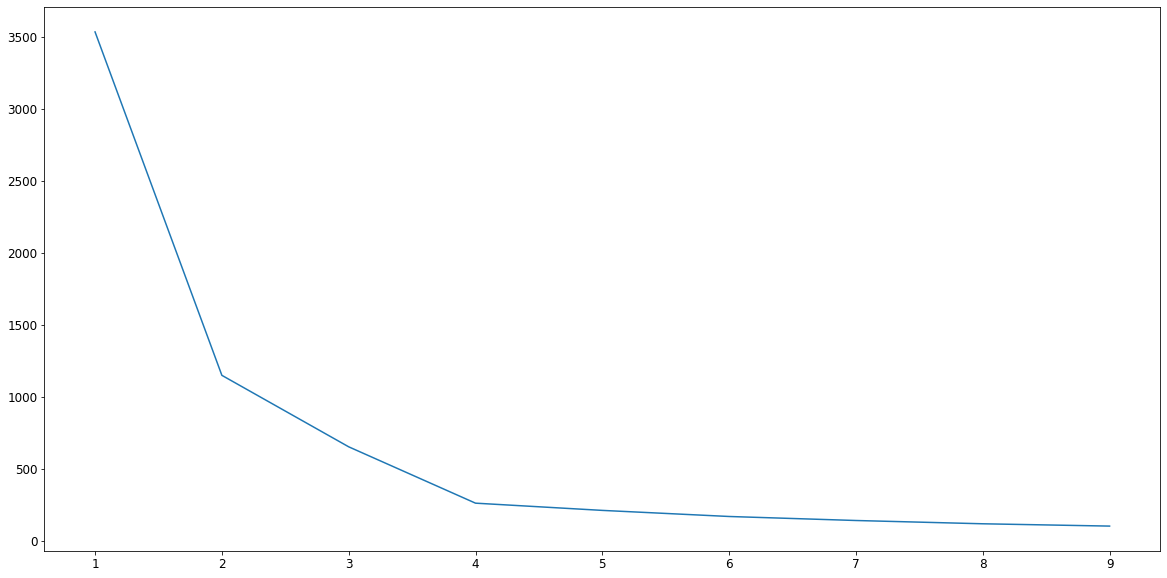

In [19]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
plt.plot(number_of_cluster,inertia)
plt.show()

As we can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an "elbow" at k=4. So, if we did not know better, 4 would be a good choice.
However, this technique for choosing the best value for the number of clusters is rather coarse. A more precise approach is to use the *silhouette score*, which is the mean *silhouette coefficient* over all the instances. An instance's silhouette coefficient is equal to (b - a) / max(a,b) where a is the mean distance to the other instances in the same cluster ( the mean intra-cluster distance) and b is the mean nearest-cluster distance ( the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance's own cluster). The silouette coefficient can vary between -1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [20]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_score(X,kmeans.labels_)

0.5667143721916615

In [21]:
silhouettescore = []
number_of_cluster = []
for i in range(2,10):
    number_of_cluster.append(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    silhouettescore.append(silhouette_score(X,kmeans.labels_))

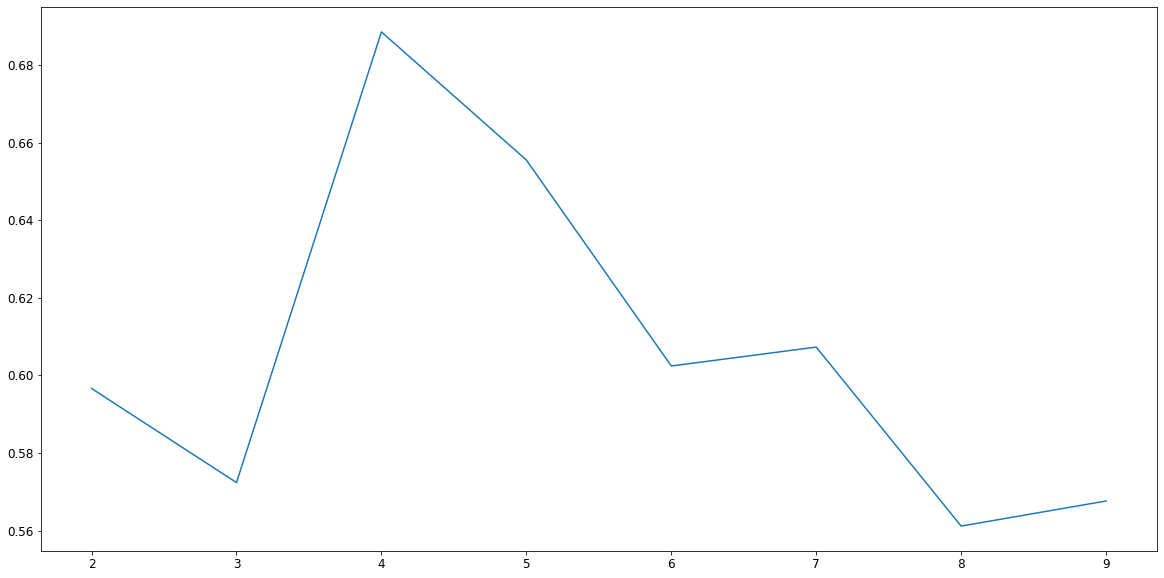

In [22]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
plt.plot(number_of_cluster,silhouettescore)
plt.show()

As we can see, this visualization is much richer than the previous one: although it confirms that k = 4 is a very good choice,it also underlines the fact that k = 5 is quite good as well.
An even informative visualization is obtained when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called the *silhouette diagram*. Each diagram contains one knife shape per cluster. The shape's height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

For n_clusters = 2 The average silhouette_score is : 0.5966442557582528
For n_clusters = 3 The average silhouette_score is : 0.5723900247411775
For n_clusters = 4 The average silhouette_score is : 0.688531617595759
For n_clusters = 5 The average silhouette_score is : 0.655517642572828
For n_clusters = 6 The average silhouette_score is : 0.6023193435632709
For n_clusters = 7 The average silhouette_score is : 0.6068660656395705
For n_clusters = 8 The average silhouette_score is : 0.5616197554327232
For n_clusters = 9 The average silhouette_score is : 0.5667143721916615


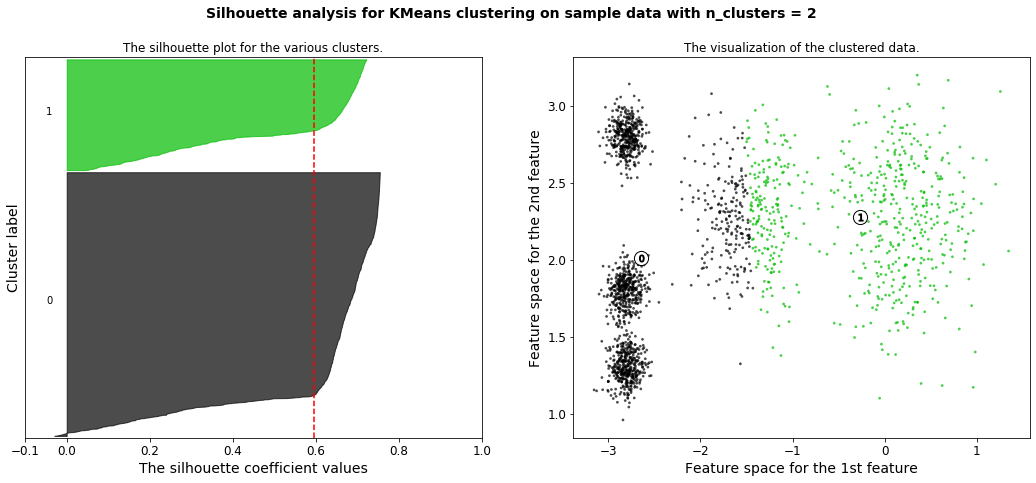

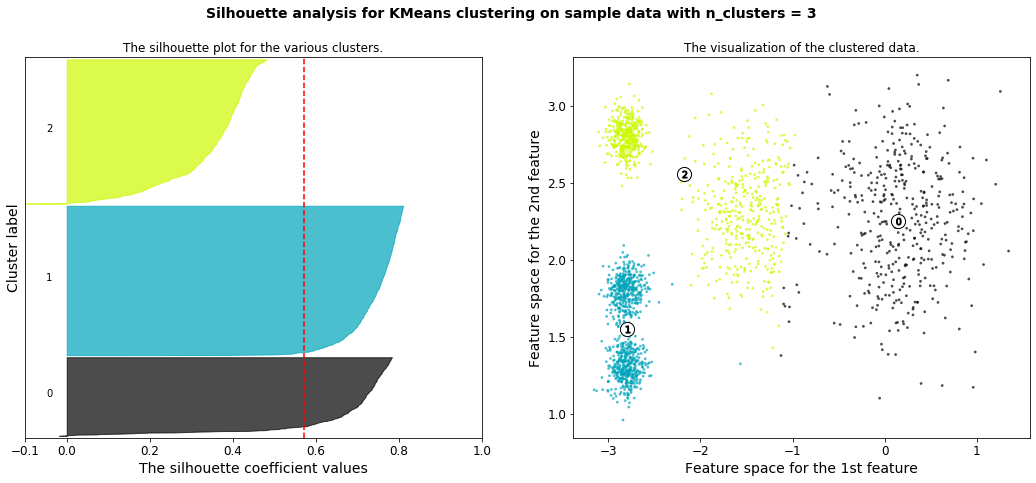

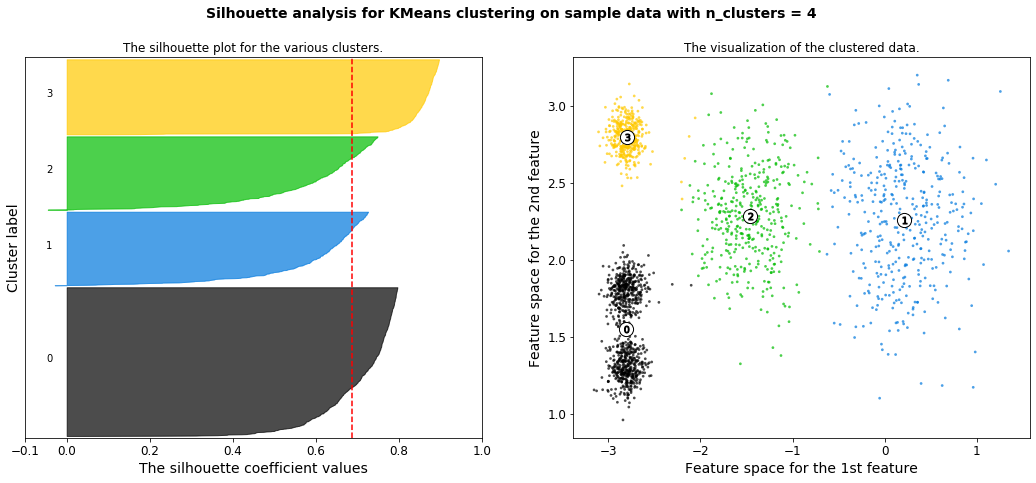

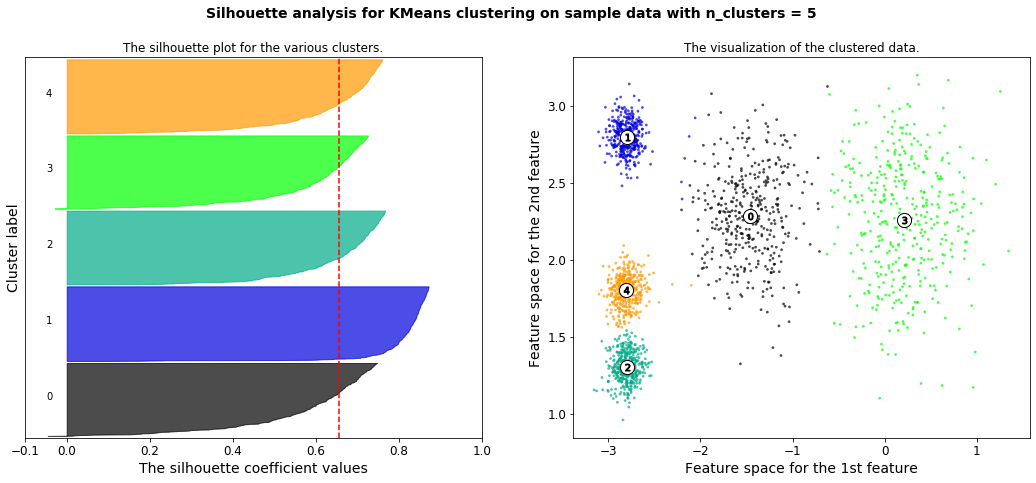

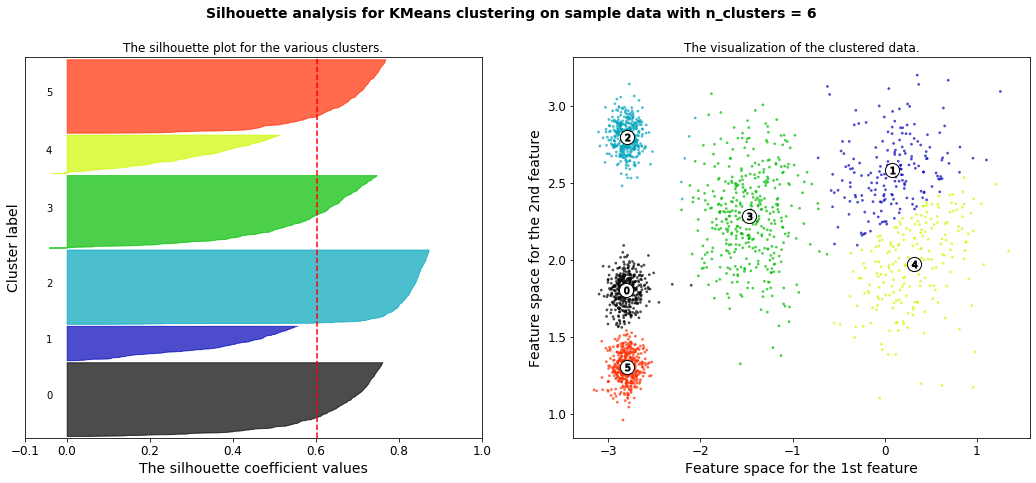

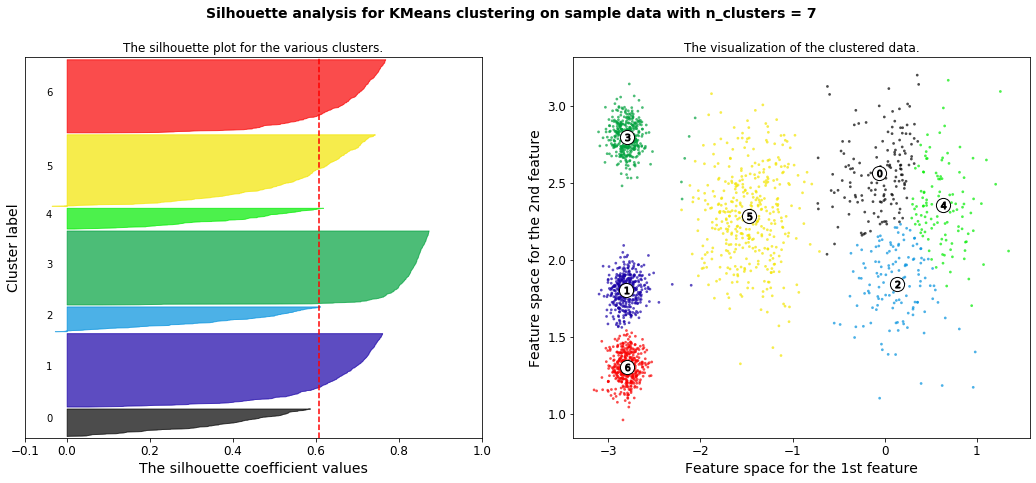

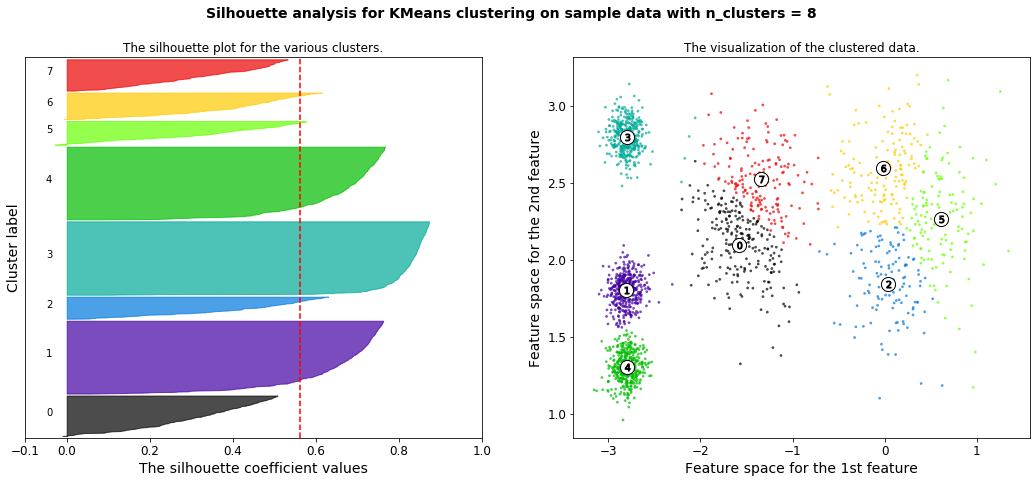

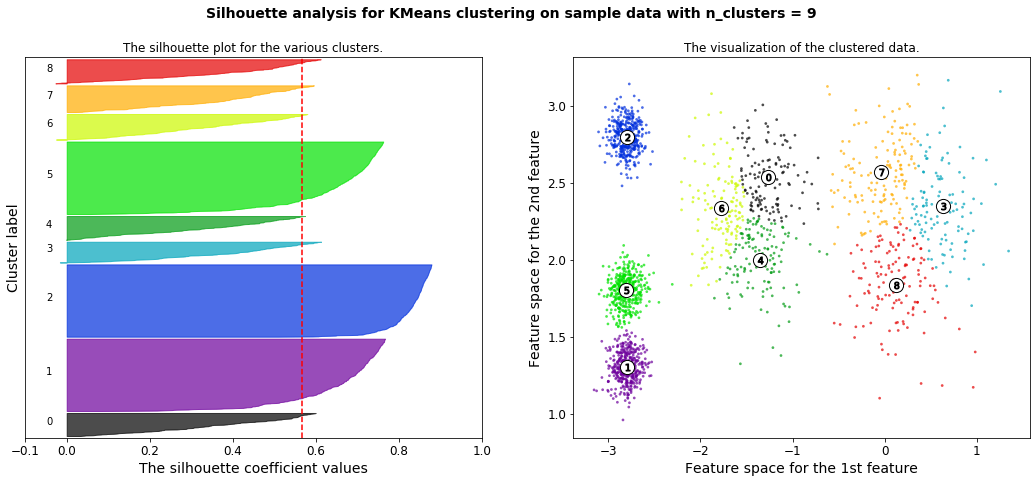

In [23]:
for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score, the the cluster is rather bad since this means its instances are much too close to other clusters.

So we should be on the lookout for the clusters to be closer to 1, and having roughly the same size. Here, k= 5 is our best option.

### Limits of K-Means

Despite its many merits, most notably being fast and scalable, K-Means is not perfect. As we saw, it is necessary to run the algorithm several times to avoid suboptimal solutions, plus we need to specify the number of clusters, which can be quite a hassle. Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes. So depending on the data, different clustering algorithms may perform better. On these types of elliptical clusters, Gaussian mixture models work great.

/!\ It is important to scale the input features before we run the K-Means, or the clusters may be very strecthed and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

### Using clustering for Image Segmentation

*Image Segmentation* is the task of partitioning an image into multiple segments. In *semantic segmentation*, all pixels that are part of the same object type get assigned to the same segment. In *instance segmentation*, all pixels that are part of the same individual object are assigned to the same segment. In this case, there would be a different segment for each pedestrian.

Here we are going to do something much simpler: *color segmentation*. We will simply assign pixels to the same segment if they have a similar color.

In [24]:
from matplotlib.image import imread

In [25]:
image = imread(os.path.join("ladybug.png"))

In [26]:
image.shape

(533, 800, 3)

In [27]:
print(f"Height of the image: {image.shape[0]}")
print(f"Width of the image: {image.shape[1]}")
print(f"Number of colors channels: {image.shape[2]}") #RGB colors

Height of the image: 533
Width of the image: 800
Number of colors channels: 3


In [28]:
X = image.reshape(-1,3) #We keep the colors channels but we transform the image to get the long list of RGB colors

In [29]:
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

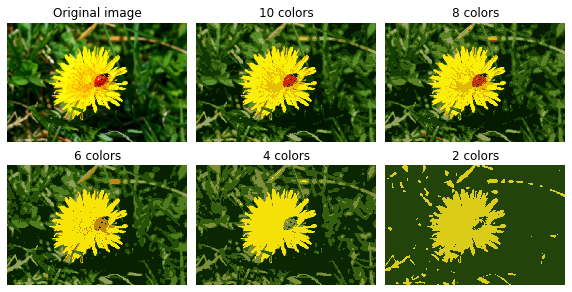

In [30]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

segmented_imgs = []
for idx,i in enumerate(range (10,0,-2)):

    kmeans = KMeans(n_clusters=i).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title(f"{i} colors")
    plt.axis('off')

For example, it may identify a color cluster for all shades of green. Next, for each color, it looks for the mean color of the pixel's color cluster. For example, all shades of green may be replaced with the same light green color (assuming the mean color of the green cluster is light green).

/!\ K-Means prefers clusters of similar size. The ladybug is flashy but smaller than the rest of the image, so K-Means fails to dedicate a cluster to it.

### Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm.

In [31]:
from sklearn.datasets import load_digits

In [32]:
X_digits,y_digits = load_digits(return_X_y=True) #Importing the dataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42) #Divide the dataset in two

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr_clf = LogisticRegression(random_state=42,n_jobs=-1)

In [37]:
lr_clf.fit(X_train,y_train) #Fit the Logistic Regression to the data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [38]:
lr_clf.score(X_test,y_test) #Baseline Accuracy

0.9629629629629629

In [39]:
from sklearn.pipeline import Pipeline #To create a pipeline

In [40]:
pipeline = Pipeline([
    ("KMeans",KMeans(n_clusters=50)),  #50 clusters to be sure all different types of writting of the numbers
    ("lr_clf",LogisticRegression(n_jobs=-1,random_state=42))
])

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('lr_clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                                    random_state=42, solver='lbfgs', tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

In [42]:
pipeline.score(X_test,y_test)

0.9528619528619529

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
#With a GridSearch
param_grid = {"KMeans__n_clusters":range(2,100)}
grid_clf = GridSearchCV(pipeline,param_grid=param_grid,n_jobs=-1,verbose=2,cv=3)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('KMeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('lr_clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                     

In [45]:
print(f"{grid_clf.best_params_}") #Best parameters
print(f"Final score with GridSearch: {grid_clf.score(X_test,y_test)}") #Score

{'KMeans__n_clusters': 70}
Final score with GridSearch: 0.9562289562289562


### Using Clustering for Semi-Supervised Learning

Another use for the cluster is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

In [46]:
n_labeled = 50
log_reg = LogisticRegression(n_jobs=-1,random_state=42) #LogisticRegression
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [47]:
log_reg.score(X_test,y_test) #Baseline scores

0.8417508417508418

Let's see how we can do better. First, let's cluster the training set into 50 clusters. Then for each cluster, let's find the image closest to the centroid. We will call these images the *representative images*.

In [48]:
k = 50 #number of cluster
kmeans = KMeans(n_clusters=k,random_state=42) #KMeans
X_digit_dist = kmeans.fit_transform(X_train) #The arrays with the distance from the centroids
representative_digit_idx = np.argmin(X_digit_dist,axis=0) #Keeping the clusters for each array where the distance to the centroid is the lowest
X_representative_digits = X_train[representative_digit_idx]

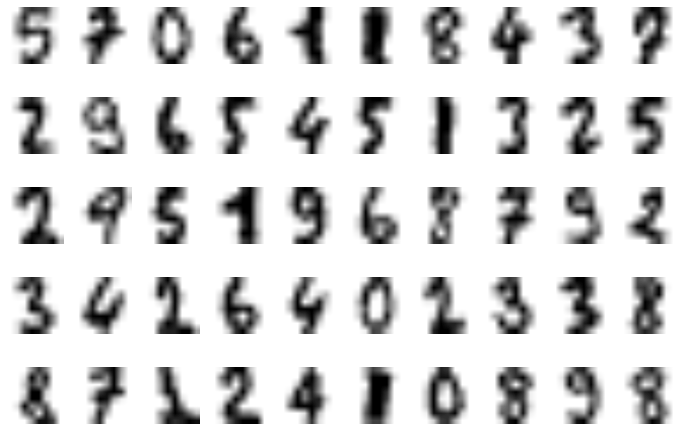

In [49]:
plt.figure(figsize=(12,8))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [50]:
y_representative_digits = np.array([5,7,0,6,1,1,8,4,3,7,2,9,6,5,4,5,1,3,2,5,2,9,5,1,9,6,8,7,9,2,3,4,2,6,4,0,2,3,3,8,8,7,1,2,4,1,0,8,9,8])

Now we have a dataset with 50 labeled instances, but instead of being random instances, each of them is a representative image of its cluster. Let's see if the performance is any better.

In [51]:
log_reg = LogisticRegression(n_jobs=-1,random_state=42) #LogisticRegression
log_reg.fit(X_representative_digits,y_representative_digits) #LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [52]:
log_reg.score(X_test,y_test) #Better score!

0.9225589225589226

Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances.

But we can go one step further and do *label propagation* which consists to propagated the labels to all the other instances in the same cluster.

In [53]:
y_train_propagated = np.empty(len(X_train),dtype=np.int32) #Initialization of an empty array
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i] #Propagate the label all over the dataset

In [54]:
#And we train again
log_reg = LogisticRegression(n_jobs=-1,random_state=42) #LogisticRegression
log_reg.fit(X_train,y_train_propagated) #LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [55]:
log_reg.score(X_test,y_test) #score?!

0.9023569023569024

The problem is that we propagated each representative instance's label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled. Let's see what happens if we only propagate the labels to the 20% of the instances that are closest to the centroids.

In [56]:
percentile_closest = 20

X_cluster_dist = X_digit_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist,percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [57]:
#And we train again
log_reg = LogisticRegression(n_jobs=-1,random_state=42) #LogisticRegression
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated) #LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [58]:
log_reg.score(X_test,y_test) #Better score!

0.9393939393939394

With just 50 labeled instances (5 per classes on average), we got 93.9% accuracy, which is pretty close to the performance of LogisticRegression on the fully labeled digits dataset (96.12%). This good performance is due to the fact that the propagated labels are actually pretty good - their accuracy is very close to 99%, as the following code shows.

In [59]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9961832061068703

#### Active Learning

To continue improving the model and the training set, the next step could be to do a few rounds of active learning, which is when a human experts interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them. There are many different strategies for active learning, but one of the most common ones is called *uncertainty sampling*.
* 1: The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
* 2: The instances for which the model is most uncertain (when its estimated probability is lowest) are given to the expert to be labeled.
* 3: Iteration of the process until the performance improvement stops being worth the labeling effort.

Other strategies include labeling the instances that would result in the largest model change, or the lastest drop in the model's validation error, or the instances that different models disagree on (e.g., an SVM, or a RandomForest).

## DBSCAN

This algorithm defines clusters as continuous regions of high density. Here is how it works:

* For each instance, the algorithm count how many instances are located within a small distance e (epsilon) from it. This region is called the instance's e-neighborhood.

* If an instance has at least *min_samples* instances in its e-neighborhood (including itself), it is considered as a *core instance*. In other words, core instances are those that located in dense regions.

* All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

* Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions.

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [61]:
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [62]:
dbscan.labels_[:10] # labels (first ten samples)

array([ 1,  0,  0, -1,  1,  2,  3,  2,  2,  0])

If the cluster index equal to -1, then it means that they are considered as anomalies by the algorithm.

In [63]:
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_[:10]) #Indice of the core instances (first ten)
print(dbscan.components_[:10]) #Core instances (first ten)

801
[ 1  2  4  5  6  7  8  9 11 13]
[[ 0.04722455  0.46553855]
 [ 0.52165502 -0.42699067]
 [-0.48446288  0.92451716]
 [ 1.44631683 -0.37318315]
 [ 1.08624443 -0.46787806]
 [ 1.72965425 -0.24049183]
 [ 2.04032336  0.28535237]
 [ 0.4524519  -0.3802527 ]
 [-0.00569465  0.3602785 ]
 [ 1.33007014 -0.48556891]]


The DBSCAN class dot not have a predict() method. It cannot predict which cluster a new instance belongs to. This implementation decision was made because different classification algorithms can be better for different tasks, so it has to be implemented manually.

In [64]:
from sklearn.neighbors import KNeighborsClassifier #The algorithm for predicting new instances

In [65]:
knn = KNeighborsClassifier(n_neighbors=50) 
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_]) #Fit the instances

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [66]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])

In [67]:
knn.predict(X_new)

array([6, 0, 5, 2])

In [68]:
knn.predict_proba(X_new)

array([[0.2 , 0.3 , 0.  , 0.  , 0.  , 0.  , 0.46, 0.04],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.38, 0.  , 0.6 , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

We only trained the classifier on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies. Because there's no anomaly in the training set, the classifier always chooses a cluster, even when that cluster is far away. It is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies.

In [69]:
y_dist, y_pred_idx = knn.kneighbors(X_new,n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel() #Two instances are anomalies!

array([-1,  0,  5, -1])

DBSCAN is a very powerful algorithm capable of identifying any number of clusters of any shape. It is robust to outliers, and it has just two hyperparameters (eps and min_samples). If the density varies significantly across the clusters (even though it can impossible for it to capture all the clusters properly).

## Other Clustering Algorithms

Agglomerative clustering:
* A hierarchy of clusters is built from the bottom up. At each iteration, agglomerative clustering connects the nearest pair of clusters (starting with individual instances). If we drew a tree with a branch for every pair of clusters that merged, we would get a binary tree of clusters, where the leaves are the individual instances. This approach scales very well to large numbers of instances or clusters. It can capture clusters of various shapes, it produces a flexible and informative cluster tree. It can scale nicely to large numbers of instances if we provide a connectivity matrix (sklearn.neighbors.kneighbors_graph()). Without it, it does not scale well.

BIRCH:
* Balanced Iterative Reducing and Clustering using Hierarchies. Designed for very large datasets, can be faster than KMeans with similar results, as long as the number of features is not too large (<20). During training, it builds a tree structure containing just enough information to quickly assign each new instance to a cluster without having to store all the instances in the tree.

Mean-Shift:
* This algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean. Next, it iterates this mean-shifting step until all the circles stop moving (i.e., until each of them is centered on the mean oof the instances it contains). Mean-Shift shifts the circles in the direction of the higher density, until each of them has found a local density maximun. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster. Mean-Shift has some of the same features as DBSCAN (find any number of clusters of any shape, and a few hyperparameters) and relies on density estimation. But it tends to chop clusters into pieces if they have internal density variations. Not suited for large datasets.

Affinity propagation:
* Uses a voting system where instances vote for similar instances to be their representatives, and once the algorithm converges, each representative and its voters form a cluster. It can detect any number of clusters of different sizes, however not suited for large datasets.

Spectral clustering:
* Takes a similarity matrix between the instances and creates a low-dimensional embedding from it (e.g., it reduces dimensionality) then it uses another clustering algorithm in this low-dimensional space (Kmeans for the scikit-learn implementation). It does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes.


## Gaussian Mixtures

A *Gaussian Mixture model* (GMM) is a probabilitistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation. When we observe an instance, we know it was generated from one of the Gaussian distributions, but we are not told which one, and we do not know what the parameters of these distributions are.

There are several GMM variants. In the simplest variant, implemented in the GaussianMixture class, we must know in advance the number k of Gaussian distributions.

In [70]:
from sklearn.mixture import GaussianMixture

In [71]:
gm = GaussianMixture(n_components=3,n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [72]:
print(gm.weights_) #Weights
print("\n")
print(gm.means_) # Means
print("\n")
print(gm.covariances_) #Covariances

[0.59973465 0.20367195 0.1965934 ]


[[ 0.49098257  0.26126893]
 [ 1.74381415 -0.05581233]
 [-0.75700146  0.54134626]]


[[[ 0.17442313 -0.10679114]
  [-0.10679114  0.29091714]]

 [[ 0.05145307  0.06043583]
  [ 0.06043583  0.0851956 ]]

 [[ 0.04612981  0.05724709]
  [ 0.05724709  0.08749202]]]


This class relies on the *Expectation-Maximization* (EM) algorithm, which has many similarities to the K-Means. It also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters ( this is called the *expectation step*) and then updating the clusters (this is called (*maximization step*). In the context of clustering, EM can be thought as a generalization of K-Means that not only finds the cluster centers, but also their size, shape, and orientation, as well as their relative weights. Unlike K-Means, EM uses soft cluster assignements, not hard assignments. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the *responsaiblities* of the clusters for the instances. During the maximization step, each cluster's update will mostly be impacted by the instances it is most responsible for. Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution (thus why n_init = 10, default is 1).

In [73]:
gm.converged_

True

In [74]:
gm.n_iter_

17

Now, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering).

In [75]:
gm.predict(X[:10]) # sample of ten instances

array([2, 0, 0, 0, 2, 1, 0, 1, 1, 0])

In [76]:
gm.predict_proba(X[:10])

array([[9.94253315e-004, 1.90003532e-211, 9.99005747e-001],
       [1.00000000e+000, 7.92227851e-109, 2.26052602e-018],
       [1.00000000e+000, 1.63190297e-023, 8.27989144e-094],
       [1.00000000e+000, 4.54516186e-059, 4.81760044e-047],
       [6.12558258e-002, 4.13628093e-219, 9.38744174e-001],
       [6.67212207e-002, 9.33278779e-001, 5.18258308e-199],
       [9.98567331e-001, 1.43266892e-003, 2.94642583e-159],
       [1.14159069e-002, 9.88584093e-001, 6.34519218e-227],
       [1.19128600e-004, 9.99880871e-001, 1.22385928e-220],
       [1.00000000e+000, 1.14381175e-028, 2.74503588e-084]])

A Gaussian mixture model is a *generative model* meaning that we can sample new instances from it.

In [77]:
X_new, y_new = gm.sample(6)

In [78]:
for instance,label in zip(X_new,y_new):
    print(instance,label)

[-0.65805904  1.60096996] 0
[0.95677812 0.05277568] 0
[0.8744905  0.19164939] 0
[0.328963   0.27101306] 0
[ 0.49369143 -0.25820096] 0
[-0.66545374  0.64835834] 2


It is possible to estimate the density of the model at any given location. This is achived using the score_sample() method: for each instance it is given, this method estimates the log of the *probability density function* (PDF) at that location.

In [79]:
gm.score_samples(X[:10]) #The greater the score, the higher the density

array([-0.12219477, -1.30593775, -1.72771469, -1.98014285, -0.67588109,
       -0.64581121, -2.04053499, -0.80284902, -0.67463999, -1.71634942])

If we compute the exponential of these socres, we will get the value of the PDF at the location of the given instances. These are not probabilities, but probability *densities*: they can take any positive value, not just a value between 0 and 1. To estimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region.

When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn. One way to do this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices (using "spherical", "diag" or "tied"). By default, the parameter is equal to "full", which means that each cluster can take on any shape, size and orientation.

## Anomaly Detection Using Gaussian Mixtures

*Anomaly detection* also called *outlier detection* is the task of detecting instances that deviate strongly from the norm.  They are called *anomalies* or *outliers* while the normal instances are called *inliers*.

Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density regian can be considered an anomaly, but the density threshold must be defined.
Example:  A manufacturing company that tries to detect defective products, the ratio of defective products is usually well known. Say it is equal to 4%. We can then set the density thresold to be equal at 4% of the instances located in the areas below the threshold density. If too much false positives, the threshold can be lowered. In the other hand, if too much false negative, the threshold can be increased. 

In [80]:
densities = gm.score_samples(X)

In [81]:
density_threshold = np.percentile(densities,4)

In [82]:
anomalies = X[densities < density_threshold]

A closely related task is *novelty detection*: it differs from anomaly detection in that the algorithm is assumed to be trained on a "clean" dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption (since it is used often to clean up datasets).

/!\ Gaussian Mixture models try to fit all the data, including the outliers, so if we have too many of them, this will bias the model's view of "normality", and some outliers may wrongly be considered as normal. If this happens, we can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned-up dataset. Another approach is to use robust covariance estimation methods (EllipticEnvelope class).

## Selecting the Number of Clusters

With K-Means, we could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, we can try to find the model that minimizes a *theoretical information criterion*, such as *Bayesia information criterion* (BIC) or the *Akaike information criterion* (AIC).

Both the BIC and the AIC penalize models that have more parameters to learn (e.g. more clusters) and reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is espcially true for large datasets).

In [83]:
print(f"BIC score: {gm.bic(X)}") #BIC 
print(f"AIC score: {gm.aic(X)}") #AIC

BIC score: 2748.3981042031314
AIC score: 2664.966264460435


To get the optimal number of clusters, we have to find when the AIC and/or the BIC are the lowest. We could also try to find the best value for the hyperparameter covariance_type.

## Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, we can use BayesianGaussianMixture class, which is capable of giving weights equal or close to zero to unnecessary clusters. Set the number of clusters n_components to a value belived to be higher than the optimal one and the algorithm will eliminate the unnecessary clusters automatically.

In [84]:
from sklearn.mixture import BayesianGaussianMixture

In [85]:
bgm = BayesianGaussianMixture(n_components=10,n_init=10) #10 iterations

In [86]:
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [87]:
np.round(bgm.weights_,2)

array([0.1 , 0.12, 0.13, 0.17, 0.13, 0.11, 0.16, 0.08, 0.  , 0.  ])

Prior knowledge about the latent variables Z can be encoded in a probability distribution p(z) called the *prior*. For example, we may have a prior belief that the clusters are likely to be few (low concentration), or conversely, that they are likely to be plentiful (high concentration). This prior belief about the number of clusters can be adjusted using the weight_concentration_prior hyperparameter. Setting it to 0.01 or 10,000 gives very different clusterings. The more data we have, however, the less the priors matter.

Gaussian mixture models work great on clusters with ellipsoidal shapes, but if we try to fit the dataset with different shapes, we may have bad surprises.

## Other algorithms for anomaly and novelty detection

PCA:
* If we compare the reconstruction error of a normal instance with the reconstruction error of an anomaly, the latter will usually be much larger. This is a simple and often quite efficient anomaly detection approach.



Fast-MCD:
* Implemented by the EllipticEnvelope class, this algorithm is useful for outlier detection, in particular to clean up a dataset. It assums that the normal instances (inliers) are generated from a single Guassian distribution (not a mixture). It also assumes that the dataset is contaminated with outliers that were not generated from this Gaussian distribution. When the algorithm estimates the parameters of the Gaussian distribution (i.e. the shape of the elliptic envelope around the inliner), it is careful to ignore the instances that are most likely outliers. This technique gives a better estimation of the elliptic envelope and thus makes the algorithm better at identifying the outliers.


Isolation Forest:
* This is an efficient algorithm for outlier detection, especially in high-dimensional datasets. The algorithm builds a Random Forest in which each Decision Tree is grown randomly; at each node, it picks a feature randomly, then it picks a random threshold value (between the min and the max values) to split the dataset in two. The dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances. Anomalies are usually far from other instances, so on average (across all the DT) they tend to get isolated in few steps than normal instances.


Local Outlier Factor (LOF):
* It compares the density of instances around a given instance to the density around its neighbors. Anomaly is often more isolated than its k nearest neighbors.


One-class SVM:
* This algorithm is better suited for novelty detection. Recalled that a kernelized SVM classifier separates two classes by first (implicitely) mapping all the instances to a high-dimensional space, then separating the two classes using a linear SVM classifier within this high-dimensional space. Since we just have one class of instances, the one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin. In the original space, this will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. There are a few parameters to tweak; the usual ones for a kernelized SVM, plus a margin hyperparameter that corresponds to the probability of a new instance being mistakenly considered as novel when it is in fact normal. It works great with high-dimensional dataset but does not scale great (like SVM).
